In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

sns.set_style("darkgrid")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
tools = pd.read_parquet('../data/tools.parquet')

In [4]:
inc_tools = [
    'prediction-online', 
    'prediction-offline', 
    'claude-prediction-online', 
    'claude-prediction-offline', 
    'prediction-offline-sme',
    'prediction-online-sme',
    'prediction-request-rag',
    'prediction-request-reasoning',
    'prediction-url-cot-claude', 
    'prediction-request-rag-claude',
    'prediction-request-reasoning-claude'
]
# include only tools that are in inc_tools
tools_inc = tools[tools['tool'].isin(inc_tools)]

In [5]:
# only include non error requests
tools_non_error = tools_inc[tools_inc['error'] != 1]
tools_non_error['currentAnswer'].replace('no', 'No', inplace=True)
tools_non_error['currentAnswer'].replace('yes', 'Yes', inplace=True)
tools_non_error = tools_non_error[tools_non_error['currentAnswer'].isin(['Yes', 'No'])]
tools_non_error = tools_non_error[tools_non_error['vote'].isin(['Yes', 'No'])]

In [6]:
tools_non_error['win'] = tools_non_error['currentAnswer'] == tools_non_error['vote']
tools_non_error['win'] = tools_non_error['win'].astype(int)

In [7]:
del tools
del tools_inc
gc.collect()

0

In [8]:
tools_non_error.head()

request_id  request_block  \
0  3006386814233319828691780626079673319114537324...       29624577   
1  3331123099573261158036411767774642098138230831...       29624616   
4  8876870293926357350592315669265884828102242482...       29625975   
5  2909784377514364366708664729310496697567238257...       29626002   
6  1027551294836394984613821404170252168134524127...       29626041   

                                      prompt_request               tool  \
0  With the given question "Will the Bored Ape Ya...  prediction-online   
1  With the given question "Will the Xbox 360 sto...  prediction-online   
4  With the given question "Will Arctic sea ice r...  prediction-online   
5  With the given question "Will Amazon have a ne...  prediction-online   
6  With the given question "Will the 'Jalapeño Ga...  prediction-online   

                                  nonce  \
0  f53a0449-fd88-4b19-af92-419818f83b74   
1  1a5a576c-2430-4e09-a1ec-a8166da356d4   
4  74ba8707-a7b7-4979-8845-de7d4400b011   
5  41e37a98-b091-46bb-a78a-10865ac20600   
6  c7e9c3c1-dc20-4126-b198-c10bf3257d1b   

                               trader_address  deliver_block  error  \
0  0x44d97681a1d4d86D8Ddb7D960b063E22FD9DB490       29624613    0.0   
1  0x44d97681a1d4d86D8Ddb7D960b063E22FD9DB490       29625988    0.0   
4  0x44d97681a1d4d86D8Ddb7D960b063E22FD9DB490       29626031    0.0   
5  0xDF5d21397543Eb0fB47aFc616073cD922E020635       29626020    0.0   
6  0x44d97681a1d4d86D8Ddb7D960b063E22FD9DB490       29626076    0.0   

  error_message prompt_response  ... confidence  info_utility  vote  \
0          None            None  ...        0.8           0.9   Yes   
1          None            None  ...        0.7           0.6    No   
4          None            None  ...        0.8           0.7   Yes   
5          None            None  ...        0.8           0.6   Yes   
6          None            None  ...        0.8           0.6   Yes   

   win_probability                                              title  \
0             0.60  Will the Bored Ape Yacht Club still be blockin...   
1             0.80  Will the Xbox 360 store close before 24 August...   
4             0.60  Will Arctic sea ice reach a new lowest level b...   
5             0.65  Will Amazon have a new Senior Vice President o...   
6             0.70  Will the 'Jalapeño Gate' controversy be resolv...   

  currentAnswer         request_time request_month_year  \
0            No  2023-08-24 16:04:50            2023-08   
1            No  2023-08-24 16:08:20            2023-08   
4            No  2023-08-24 18:05:35            2023-08   
5            No  2023-08-24 18:08:00            2023-08   
6            No  2023-08-24 18:11:20            2023-08   

  request_month_year_week win  
0   2023-08-21/2023-08-27   0  
1   2023-08-21/2023-08-27   1  
4   2023-08-21/2023-08-27   0  
5   2023-08-21/2023-08-27   0  
6   2023-08-21/2023-08-27   0  

[5 rows x 23 columns]

# Confidence analysis per Trader answer type

Text(0.5, 1.0, 'Distribution of confidence on the winning trades')

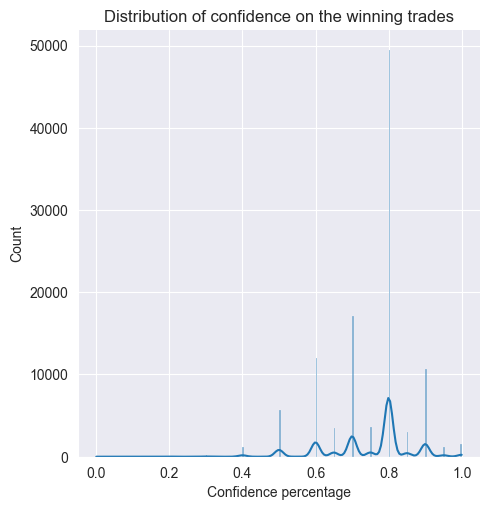

In [9]:
sns.displot(data=tools_non_error[tools_non_error["win"]==1], x="confidence", kde=True)
plt.xlabel('Confidence percentage')
plt.ylabel('Count')
plt.title('Distribution of confidence on the winning trades')

In [8]:
winning_trades = tools_non_error[tools_non_error["win"]==1]
non_winning_trades = tools_non_error[tools_non_error["win"]==0]

Text(0.5, 1.0, 'Distribution of confidence on the NON-winning trades')

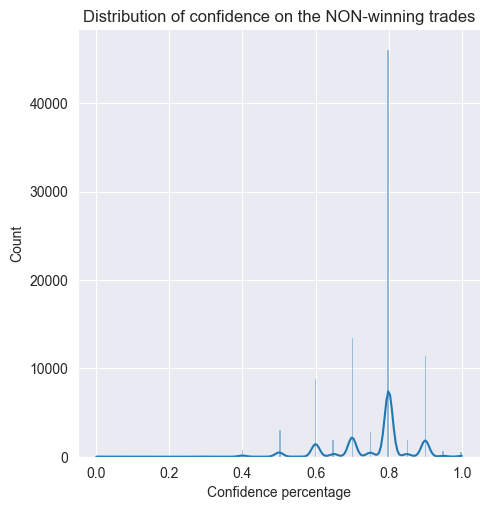

In [14]:
sns.displot(data=tools_non_error[tools_non_error["win"]==0], x="confidence", kde=True)
plt.xlabel('Confidence percentage')
plt.ylabel('Count')
plt.title('Distribution of confidence on the NON-winning trades')

In [15]:
tools_non_error.win.value_counts()

win
1    109540
0     91498
Name: count, dtype: int64

In [15]:
winning_trades.describe()

request_block  deliver_block     error          p_yes           p_no  \
count   1.095400e+05   1.095400e+05  109540.0  109540.000000  109540.000000   
mean    3.252190e+07   3.252205e+07       0.0       0.453541       0.546459   
std     1.246011e+06   1.245733e+06       0.0       0.236433       0.236433   
min     2.902952e+07   2.902953e+07       0.0       0.000000       0.000000   
25%     3.157338e+07   3.157339e+07       0.0       0.300000       0.350000   
50%     3.300844e+07   3.300848e+07       0.0       0.400000       0.600000   
75%     3.348162e+07   3.348164e+07       0.0       0.650000       0.700000   
max     3.406412e+07   3.406415e+07       0.0       1.000000       1.000000   

          confidence   info_utility  win_probability       win  
count  109540.000000  109540.000000    109540.000000  109540.0  
mean        0.749623       0.643063         0.713424       1.0  
std         0.116751       0.234643         0.111842       0.0  
min         0.000000       0.000000         0.502000       1.0  
25%         0.700000       0.500000         0.600000       1.0  
50%         0.800000       0.700000         0.700000       1.0  
75%         0.800000       0.800000         0.800000       1.0  
max         1.000000       1.000000         1.000000       1.0

In [17]:
winning_trades.confidence.describe()

count    109540.000000
mean          0.749623
std           0.116751
min           0.000000
25%           0.700000
50%           0.800000
75%           0.800000
max           1.000000
Name: confidence, dtype: float64

In [16]:
non_winning_trades.describe()

request_block  deliver_block    error         p_yes          p_no  \
count   9.149800e+04   9.149800e+04  91498.0  91498.000000  91498.000000   
mean    3.233187e+07   3.233206e+07      0.0      0.523302      0.476698   
std     1.263300e+06   1.262970e+06      0.0      0.219429      0.219429   
min     2.902954e+07   2.902955e+07      0.0      0.000000      0.000000   
25%     3.140342e+07   3.140344e+07      0.0      0.300000      0.300000   
50%     3.277588e+07   3.277591e+07      0.0      0.600000      0.400000   
75%     3.330261e+07   3.330264e+07      0.0      0.700000      0.700000   
max     3.406362e+07   3.406364e+07      0.0      1.000000      1.000000   

         confidence  info_utility  win_probability      win  
count  91498.000000  91498.000000     91498.000000  91498.0  
mean       0.761938      0.644957         0.695807      0.0  
std        0.107188      0.218935         0.101741      0.0  
min        0.000000      0.000000         0.502000      0.0  
25%        0.700000      0.500000         0.600000      0.0  
50%        0.800000      0.700000         0.700000      0.0  
75%        0.800000      0.800000         0.800000      0.0  
max        1.000000      1.000000         1.000000      0.0

In [18]:
non_winning_trades.confidence.describe()

count    91498.000000
mean         0.761938
std          0.107188
min          0.000000
25%          0.700000
50%          0.800000
75%          0.800000
max          1.000000
Name: confidence, dtype: float64

This means on average the non winning trades show a higher confidence.

# Correlation between confidence and win_probability

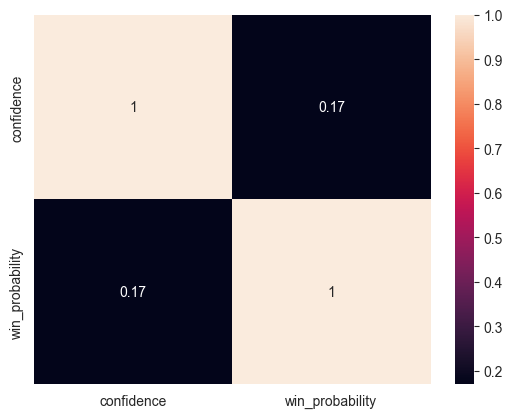

In [21]:

corr_matrix = tools_non_error[["confidence", "win_probability"]].corr().round(2)
sns.heatmap(corr_matrix, annot=True)
plt.show()

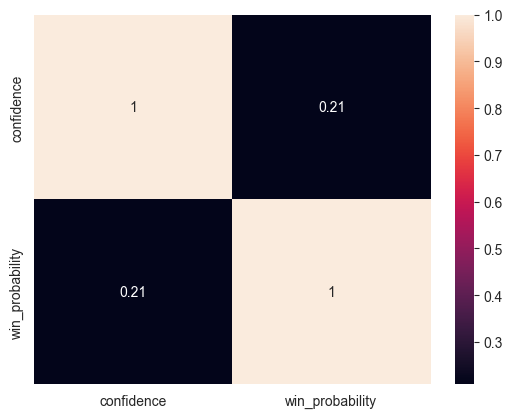

In [22]:
corr_matrix = winning_trades[["confidence", "win_probability"]].corr().round(2)
sns.heatmap(corr_matrix, annot=True)
plt.show()

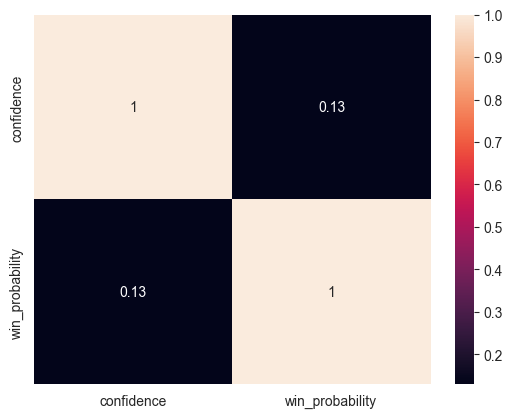

In [23]:
corr_matrix = non_winning_trades[["confidence", "win_probability"]].corr().round(2)
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Per tool analysis

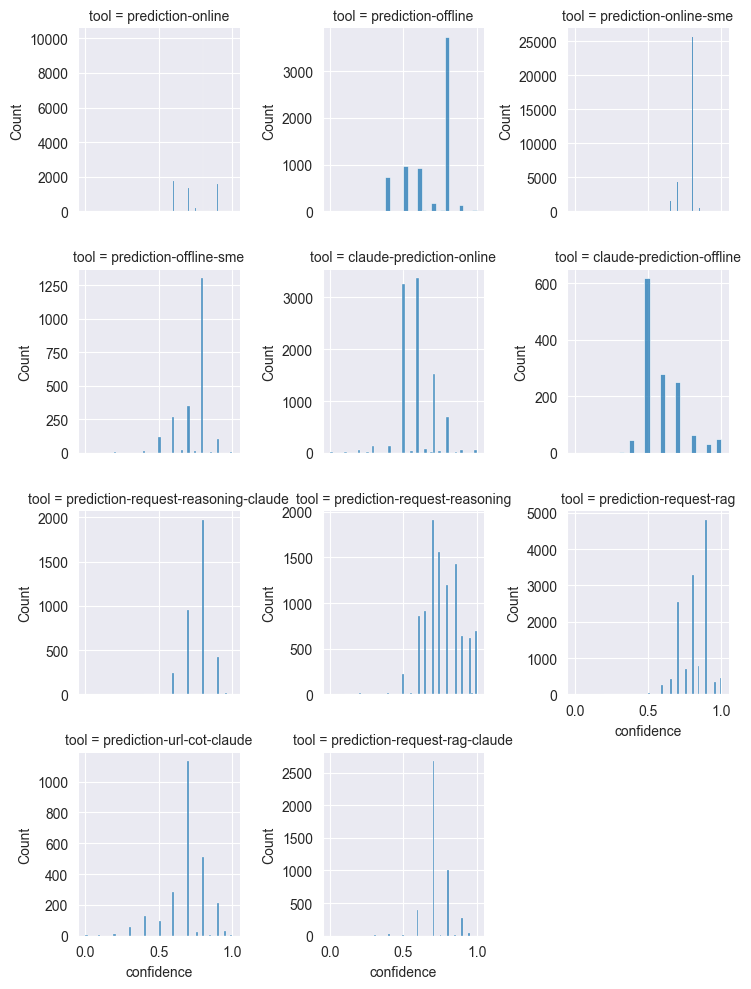

In [9]:
g = sns.FacetGrid(winning_trades, col="tool", height=2.5, col_wrap=3, sharey=False)
g.map(sns.histplot, "confidence")

In [10]:
winning_trades.groupby("tool")[["confidence"]].agg(['median', 'mean', 'count'])

confidence                 
                                        median      mean  count
tool                                                           
claude-prediction-offline                 0.60  0.596431   1331
claude-prediction-online                  0.60  0.590868   9527
prediction-offline                        0.80  0.684258   6816
prediction-offline-sme                    0.80  0.743488   2196
prediction-online                         0.80  0.770757  16132
prediction-online-sme                     0.80  0.771355  39269
prediction-request-rag                    0.80  0.817804  13603
prediction-request-rag-claude             0.70  0.725028   4447
prediction-request-reasoning              0.75  0.771400  10090
prediction-request-reasoning-claude       0.80  0.772052   3630
prediction-url-cot-claude                 0.70  0.694298   2499

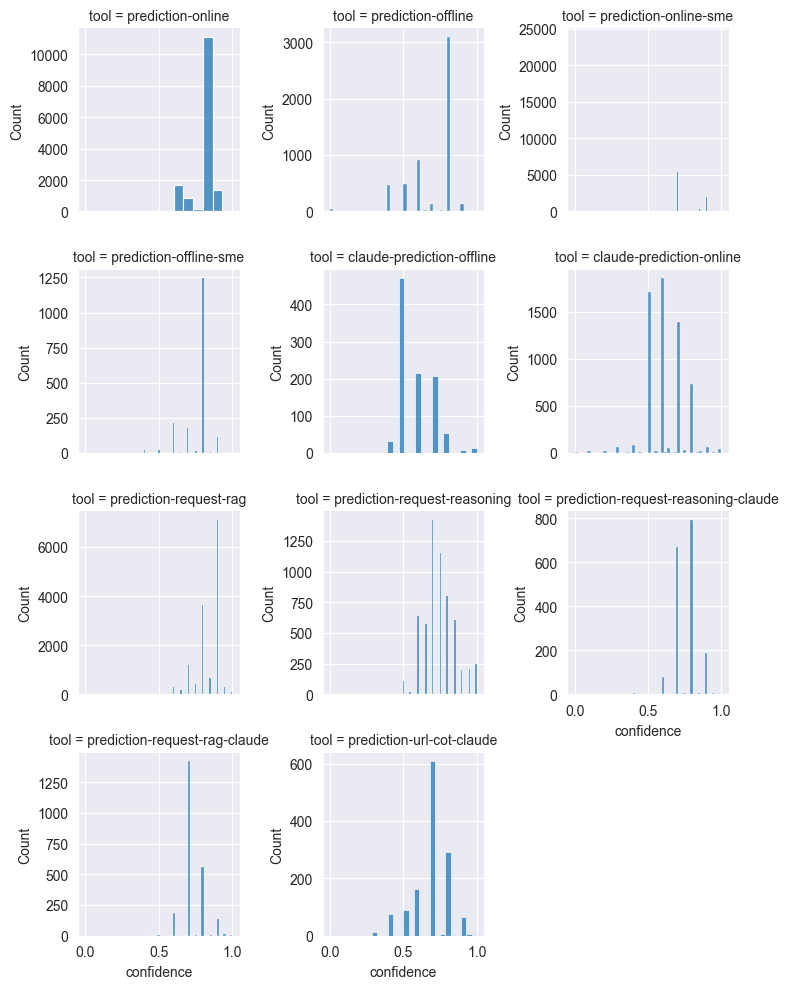

In [11]:
g = sns.FacetGrid(non_winning_trades, col="tool", height=2.5, col_wrap=3, sharey=False)
g.map(sns.histplot, "confidence")

In [12]:
non_winning_trades.groupby("tool")[["confidence"]].agg(['median', 'mean', 'count'])

confidence                 
                                        median      mean  count
tool                                                           
claude-prediction-offline                 0.50  0.584436   1001
claude-prediction-online                  0.60  0.616474   6182
prediction-offline                        0.80  0.694949   5355
prediction-offline-sme                    0.80  0.763837   1814
prediction-online                         0.80  0.780465  15329
prediction-online-sme                     0.80  0.770700  36533
prediction-request-rag                    0.90  0.840758  13900
prediction-request-rag-claude             0.70  0.729777   2334
prediction-request-reasoning              0.75  0.746198   5973
prediction-request-reasoning-claude       0.80  0.763014   1752
prediction-url-cot-claude                 0.70  0.686226   1325

In conclusion we found tools very confident on both sides of the winning and non winning answers.

In [13]:
del tools_non_error
del winning_trades
del non_winning_trades
gc.collect()

444

: 